## 29. Нелинейный метод наименьших квадратов

[Ratkowsky D. A. Nonlinear Regression Modeling. 1983]

Нелинейным методом наименьших квадратов
построить модели вида
$$
y = \frac{\beta_1}{1 + \beta_2 e^{-\beta_3 t}},
\qquad
\mbox{и}
\qquad
y = \frac{\beta_1}{(1 + \beta_2 e^{-\beta_3 t})^{1/\beta_4}},
$$
для данных, приведенных в таблице
```
    t         y
  ----------------
    1       16.08
    2       33.83
    3       65.80
    4       97.20
    5      191.55
    6      326.20
    7      386.87
    8      520.53
    9      590.03
   10      651.92
   11      724.93
   12      699.56
   13      689.96
   14      637.56
   15      717.41
```
Предиктор $t$ – время,
переменная отклика $y$ – вес сухой луковицы вместе с надземной частью растения.
Найти общую ошибку в каждом из этих случаев и сравнить результаты.


## Подключение библиотек и задание начальных значений

In [30]:

import numpy as np
from sympy import *
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
t = np.arange(1,16,1)
y= [16.08,33.83,65.80,97.20,191.55,326.20,386.87,520.53,590.03,651.92,724.93,699.56,689.96,637.56,717.41]

## Задание нужных функций f1 и f2

In [31]:

def f1(t,b1,b2,b3):
    return b1 / (1 + b2*np.exp(-1*b3*t))
def f2(t,b1,b2,b3,b4):
    return b1 / ((1+b2*np.exp(-1*b3*t))**(1/b4))

## Так как функция curve_fit возвращает два массива, последний из которых нами не используется, то и задать имя мы можем только первому массиву (название переменной"_" помогает компилятору понять, что переменная неважна или не используется в дальнейшем коде)

Для f1 [β1 β2 β3] = [7.02871539e+02 8.49922285e+01 6.88565187e-01]
Для f2 [β1 β2 β3 β4] = [699.64135945 195.79500488   0.75962554   1.27922586]


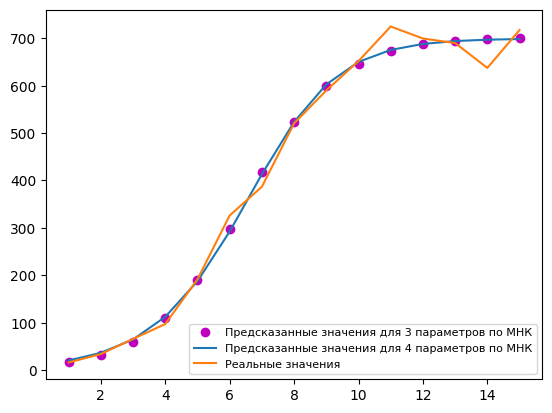

In [32]:

pn = [700,8.5,0.7]
bn, _ = curve_fit(f1, t, y,pn)
print("Для f1 [β1 β2 β3] =", bn)
pm = [700,200,0.7,1.3]
bm, _ = curve_fit(f2, t, y,pm)
print("Для f2 [β1 β2 β3 β4] =", bm)

plt.plot(t, f1(t,*bn),   "mo", label='Предсказанные значения для 3 параметров по МНК')
plt.plot(t, f2(t,*bm),  label='Предсказанные значения для 4 параметров по МНК')
plt.plot(t, y,  label='Реальные значения')
plt.legend(loc=4,fontsize=8)

## Для расчитывания ошибки в каждом из случаев будем использовать нормы: Манхеттенскую, Чебышевскую, Евклидову

In [33]:
print('Ошибка функции для 3 параметров, Манхетеннская норма: ', (linalg.norm(f1(t, *bn),1)) )
print('Ошибка функции для 4 параметров, Манхетеннская норма: ', (linalg.norm(f2(t, *bm),1)) )

print('Ошибка функции для 3 параметров, Евклидова норма: ',(linalg.norm(f1(t, *bn),2)) )
print('Ошибка функции для 4 параметров, Евклидова норма: ',(linalg.norm(f2(t, *bm),2)) )

print('Ошибка функции для 3 параметров, Чебышевская норма: ',(linalg.norm(f1(t, *bn),np.Inf)))
print( 'Ошибка функции для 4 параметров, Чебышевская норма: ',(linalg.norm(f2(t, *bm),np.Inf)))

Ошибка функции для 3 параметров, Манхетеннская норма:  6345.12759400063
Ошибка функции для 4 параметров, Манхетеннская норма:  6356.525491207973
Ошибка функции для 3 параметров, Евклидова норма:  1937.8379195368057
Ошибка функции для 4 параметров, Евклидова норма:  1937.8749652548763
Ошибка функции для 3 параметров, Чебышевская норма:  700.9241656122359
Ошибка функции для 4 параметров, Чебышевская норма:  698.4380974953659


## Вывод
Сравнивая получившиеся нормы, можно сделать вывод, что первая модель слегка точнее по Манхеттенской и Евклидовой нормам, но хуже по Чебышевской норме, чем вторая модель